<font size=5 color='blue'>

## <center> Clase 5, febrero 28 del 2023 </center>

<font size=4 color='blue'>
    
## Sistema de estudio: Mortalidad por diabetes


<font size=5 color='magenta'>
<center>En busca de las variables X y Y que definen el sistema

<img src="./images/Diabetes.png" width=420 height=420 align = "center" >

<font size=5 color='blue'>
Información sobre el sistema de estudio

<font size=4>

Evolución de la enfermedad de pacientes con Diabetes Mellitus despues de un año.
    
En el presente trabajo, la diabetes la caracterizamos con los siguientes diez rasgos: edad, sexo, índice de masa corporal, presión arterial promedio y seis mediciones de suero sanguíneo:

     Colesterol Total 
     Baja densidad de liporoteinas
     Alta densidad de lipoproteinas
     Triglicéridos
     Concentración de Lamorigina
     Glucosa

<font size=5 color='blue'>
    
Cuantificación de esta información

<font size=4>

Se tienen información de 442 pacientes (m = 442). La respuesta de interés, Y, es una medida cuantitativa de la progresión de la enfermedad un año después del inicio del estudio. Los valores de Y varían entre 25 y 346

Fuente de la información: [diabetes data](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)    Artículo original: [Least-Angle-Regression_2004](./Literatura/Least-Angle-Regression_2004.pdf)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

np.random.seed(1)

In [2]:
# Los datos se encuentran el el archivo diabetes.csv

df = pd.read_csv('diabetes.csv', sep ='\t')

# se crea el dataframe df, el cual contiene los 10 rasgos relevantes de los pacientes
# diabeticos, así como el progreso (y) de la enfermedad un año después de comenzado el estudio. 

In [3]:
# Se despliegan las primeras 5 muestras (rasgos, objetivo)

df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


<font size=4>
Las abreviaciones tienen el siguiente significado:
    
    AGE = Age
    SEX = Sex
    BMI = Body Mass Index (BMI)
     BP = Mean Arterial Pressure (MAP)
     S1 = Total Cholesterol (TC)
     S2 = Low Density lipoproteins (LDL)
     S3 = High Density lipoproteins (HDL)
     S4 = Triglyceride (TG, TCH)
     S5 = Serum Concentration of Lamorigine (LTG)
     S6 = Glucose (GLU)
     Y = Quantitative Measure of Diabetes Mellitus Disease Progression (QMDMDP) one year after the baseline.

In [4]:
# el método describe() genera una tabla con informacion estadistica de cada uno de los rasgos y del objetivo.

df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


## Se crean los histogramas para cada uno de los rasgos que caracteriza a los pacientes con diabetes:

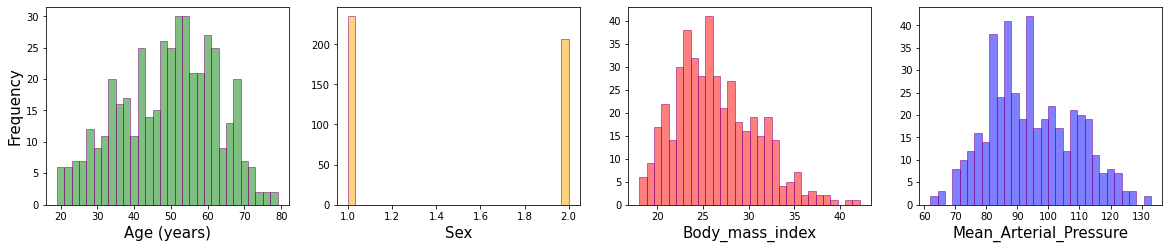

In [5]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df.AGE, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Age (years)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.SEX, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Sex', size=15)

ax3.hist(df.BMI, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('Body_mass_index', size=15)

ax4.hist(df.BP, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('Mean_Arterial_Pressure', size=15);

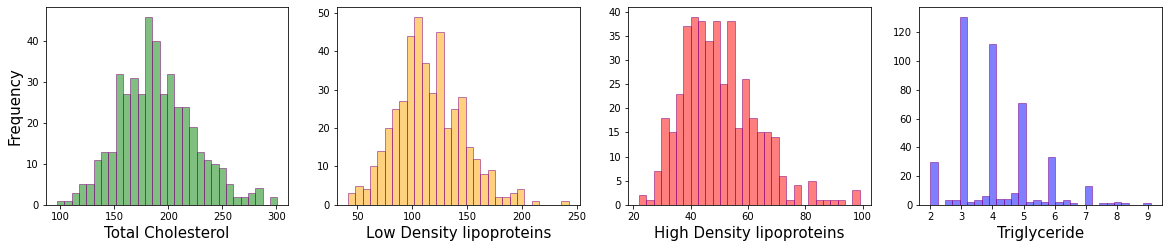

In [6]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df.S1, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Total Cholesterol', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.S2, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Low Density lipoproteins', size=15)

ax3.hist(df.S3, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('High Density lipoproteins', size=15)

ax4.hist(df.S4, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('Triglyceride', size=15);

Text(0.5, 0, 'Y(Diabetes Mellitus Disease Progression)')

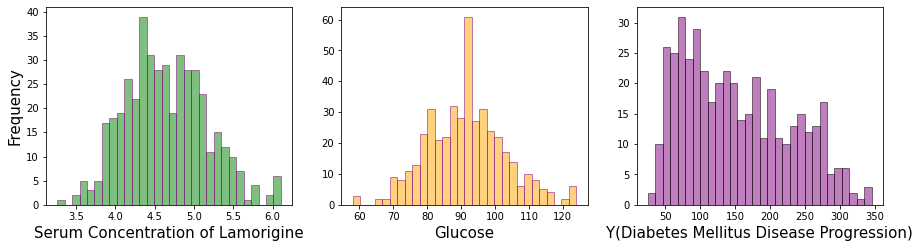

In [7]:
plt.figure(figsize=(15,8)) 

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

ax1.hist(df.S5, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Serum Concentration of Lamorigine', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.S6, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Glucose', size=15)

ax3.hist(df.Y, bins=30, color='purple',edgecolor='black', alpha=0.5)
ax3.set_xlabel('Y(Diabetes Mellitus Disease Progression)', size=15)


<font size=4>

Para quitar cualquier posible correlación entre las muestras (los renglones del DataFrame), estos se reordenan al azar.

In [8]:
df = df.sample(frac=1)

<font size=5 color='blue'>
División de las muestras para aprender y para hacer predicciones

<font size=4>
    
Se dividen la muestras originales en 2 conjuntos: 90 % para el entrenamiento y 10 % para hacer inferencias (predicciones) con el sistema de aprendizaje.

In [9]:
test_ratio = 0.1

train_ratio = int((1.0-test_ratio)*len(df.values[:,:]))

df_train = df.iloc[0:train_ratio,:]
df_test  = df.iloc[train_ratio:,:]

In [10]:
print(df_train.shape)
print(df_test.shape)

(397, 11)
(45, 11)


<font size=4>

Para trabajar con los modelos de aprendizaje,es adecuado que todas las variables tengan el mismo orden de magnitud. Por ello, se normalizan sus valores en las muestras que se emplearán en el entrenamiento, tanto los rasgos (X) y las variables objetivo (Y):

$$x_{i,norm} = \dfrac{x_{i}-\mu}{\sigma}$$
    
$$y_{i,norm} = \dfrac{y_{i}-\mu}{\sigma}$$

In [11]:
mu = df_train.mean()
sigma = df_train.std()
df_train_norm = (df_train - mu)/ sigma
df_train_norm.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
246,0.880549,-0.923573,-0.678927,-1.292722,1.678453,1.072260,1.179208,-0.202277,0.963141,-1.241175,-0.960557
425,-1.627292,-0.923573,-0.858406,-1.702184,-2.097449,-2.351121,0.482966,-1.597924,-0.422665,-1.065445,0.009443
293,-1.475302,-0.923573,1.923531,0.271467,0.439035,0.895527,0.018804,0.014824,-1.148812,-0.011066,0.638633
31,-0.487365,-0.923573,-1.374411,-1.702184,-0.800383,-1.113991,1.256568,-1.597924,-0.779650,-0.889715,-1.209611
359,0.804554,1.080025,0.106298,0.680929,0.150798,0.371874,-0.522717,0.728154,0.321844,1.306908,2.093633


<font size=5 color='blue'> 
Nota importante: La normalización de las muestras de prueba se realiza con los valores de $\mu$ y $\sigma$ obtenidos con las muestras empleadas para el entrenamiento

In [12]:
df_test_norm = (df_test - mu) / sigma
df_test_norm.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
410,-0.183384,1.080025,-0.589187,0.175420,1.015508,0.784251,-0.600078,0.728154,1.408068,-0.889715,0.756606
216,0.272587,1.080025,0.734477,1.042007,1.130803,1.556639,-1.451040,3.054233,0.974545,1.043313,1.267822
264,0.728558,1.080025,0.577432,-0.691166,-0.944502,-0.197598,-1.064239,-0.047205,-1.253375,-0.450391,-0.082314
209,0.804554,1.080025,-0.387272,1.403084,-1.059796,-0.341603,-1.605760,0.728154,-0.244655,-0.274661,-0.973665
316,0.348582,1.080025,0.285778,0.030989,0.035503,-0.439788,-0.677438,0.728154,1.597094,0.867583,0.900795


<font size=4>
    
Histogramas de las variables que se emplearán en el entrenamiento:

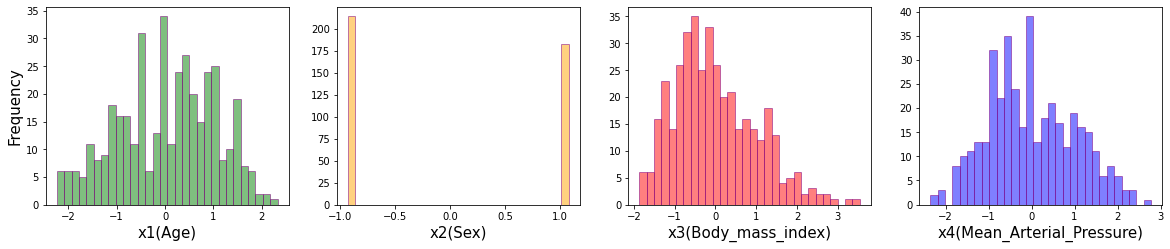

In [13]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df_train_norm.AGE, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('x1(Age)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_train_norm.SEX, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('x2(Sex)', size=15)

ax3.hist(df_train_norm.BMI, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('x3(Body_mass_index)', size=15)

ax4.hist(df_train_norm.BP, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('x4(Mean_Arterial_Pressure)', size=15);

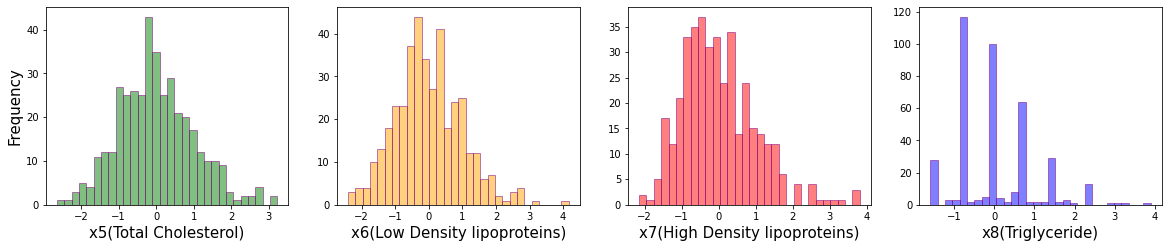

In [14]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df_train_norm.S1, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('x5(Total Cholesterol)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_train_norm.S2, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('x6(Low Density lipoproteins)', size=15)

ax3.hist(df_train_norm.S3, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('x7(High Density lipoproteins)', size=15)

ax4.hist(df_train_norm.S4, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('x8(Triglyceride)', size=15);

Text(0.5, 0, 'Y(Diabetes Mellitus Disease Progression)')

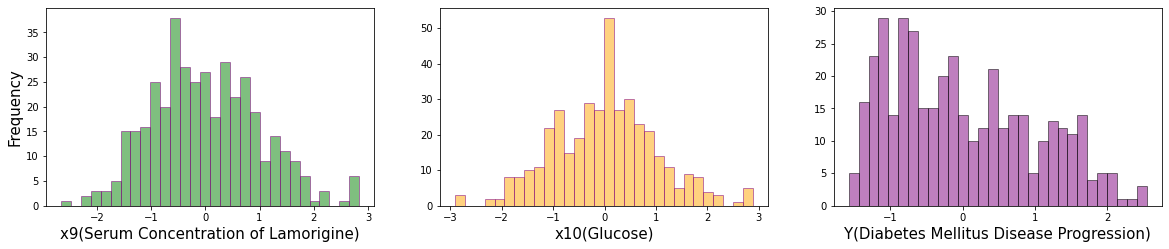

In [15]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

ax1.hist(df_train_norm.S5, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('x9(Serum Concentration of Lamorigine)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_train_norm.S6, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('x10(Glucose)', size=15)

ax3.hist(df_train_norm.Y, bins=30, color='purple',edgecolor='black', alpha=0.5)
ax3.set_xlabel('Y(Diabetes Mellitus Disease Progression)', size=15)


<font size=4>
Los valores de las variables X e Y se extraen de las columnas del DataFrame.

In [16]:
train_x = df_train_norm.values[:,:-1]
train_y = df_train_norm.values[:,-1:]

In [17]:
test_x = df_test_norm.values[:,:-1]
test_y = df_test_norm.values[:,-1:]

In [18]:
x_train = train_x.T
x_test = test_x.T

y_train = train_y.T
y_test = test_y.T

In [19]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10, 397)
(1, 397)
(10, 45)
(1, 45)


In [20]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(397, 10)
(397, 1)
(45, 10)
(45, 1)


<font size=5 color='blue'>

# <center> Artificial Neural Networks </center>




<font size=5 color='blue'>

Implementada con Python

<font size=4>

Inspirandose en modelos que intentan describir las conecciones entre las neuronas en nuestro cerebro, se propusieron (y se siguen proponiendo) modelos de redes neuronales para generar sistemas de aprendizaje. Se les conoce con el nombre de redes neuronales artificiales, o simplemente como redes neuronales.

<font size=5 color='blue'>
Implementación de una red neuronal del tipo "Full-Connected Feed-forward (FFF)".

<font size=4>

<p>En nuestro primer modelo, la red neuronal tiene 3 capas: la capa de entrada, la capa de salida y una capa interior (en la literatura, a esta capa interna se le da el nombre de capa oculta). </p>
<p>El objetivo del modelo es encontrar una función que describa la evolución de la Diabetes Mellitus en una año, a partir de su linea base, con los rasgos de la persona que se consideran importantes para su evolución. Los rasgos propuestos son: edad, sexo, índice de masa corporal, presión arterial promedio y las seis mediciones de suero sanguíneo descritas al inicio: el colesterol total, la densidad baja de lipoproteinas, la densidad alta de lipoproteinas, los trigliceridos, la concentración de lamorigina y la glucosa</p>
<p>Esta función se genera mediante una red de neuronas artificiales. Se entiende como neurona un modelo matemático simple de una neurona biológica.</p>
</font>

<font size=5 color='blue'>

Adecuando lo datos de alimentación al sistema de aprendizaje

<font size=4>

Antes de inciar el desarrollo del sistema, transformamos los datos de entrada para que sean compatibles con el modelo que desarrollaremos. El fomato de entrada de las variables X y Y, tanto para el entrenamiento como para la prueba es un poco diferente al empleado en los sistemas de aprendizaje anteriores.

<font size=5 color='blue'>
    
Definición de la arquitectura de la red neuronal.

<font size=4>
    
Se emplea indistintamente la palabra neurona o nodo para referirse al modelo matematico de la neurona.

El número de nodos en la capa de entrada depende del numero de rasgos del sistema que definen la variable objetivo, la evolución de la diabetes en un año. En el presente caso el número de rasgos es diez.

El número de nodos en la capa de salida depende del tipo de problema. En el presente caso, se tiene una sola neurona, cuya salida nos da un número que cuantifica la evolución de la diabetes en un año.

En el presente modelo, sólo tenemos una capa interna, el número de nodos en ella es variable. Se hacen pruebas con diferentes números y se adopta el que de los mejores resultados.

La función layer_sizes() genera la arquitectura de la red neuronal partiendo de los datos con que se van a alimentar a la red.


In [21]:
def layer_sizes(X, Y, n_h):
    """
    Argument:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Return:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    
    n_x = X.shape[0] 
    n_h = n_h
    n_y = Y.shape[0]
    
    return (n_x, n_h, n_y)

In [22]:
n_h = 4
n_x, n_h, n_y = layer_sizes(x_train, y_train, n_h = n_h)

In [23]:
print(n_x, n_h, n_y)

10 4 1


<font size=5 color='blue'>
Visualización de la red     
 
<font size=4 color='black'> 
    
Usaremos NetworkX, que es un paquete de Python para la creación, manipulación y estudio de la estructura, dinámica y funciones de redes complejas.
    
[NetworkX](https://networkx.github.io/)

Lo pueden instalar usando:

In [24]:
import networkx as nx

class Network(object):
    
    def  __init__ (self,sizes):
        self.num_layers = len(sizes)
        print("It has", self.num_layers, "layers,")
        self.sizes = sizes
        print("with the following number of nodes per layer",self.sizes)
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]
        
    def feedforward(self, x_of_sample):
        """Return the output of the network F(x_of_sample) """        
        for b, w in zip(self.biases, self.weights):
            x_of_sample = sigmoid(np.dot(w, x_of_sample)+b)
        return x_of_sample
    
    def graph(self,sizes):
        a=[]
        ps={}
        Q = nx.Graph()
        for i in range(len(sizes)):
            Qi=nx.Graph()    
            n=sizes[i]
            nodos=np.arange(n)
            Qi.add_nodes_from(nodos)
            l_i=Qi.nodes
            Q = nx.union(Q, Qi, rename = (None, 'Q%i-'%i))
            if len(l_i)==1:
                ps['Q%i-0'%i]=[i/(len(sizes)), 1/2]
            else:
                for j in range(len(l_i)+1):
                    ps['Q%i-%i'%(i,j)]=[i/(len(sizes)),(1/(len(l_i)*len(l_i)))+(j/(len(l_i)))]
            a.insert(i,Qi)
        for i in range(len(a)-1):
            for j in range(len(a[i])):
                for k in range(len(a[i+1])):
                    Q.add_edge('Q%i-%i' %(i,j),'Q%i-%i' %(i+1,k))
        nx.draw(Q, pos = ps)
                

It has 3 layers,
with the following number of nodes per layer [10, 4, 1]


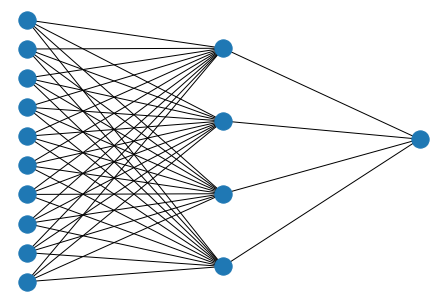

In [25]:
layers = [n_x, n_h, n_y]
net = Network(layers)
net.graph(layers)

<font size=5 color='blue'>
    
Inicializacion de los pesos y los bias.

<font size=4>
Debido a que las variables X y Y fueron normalizadas a distribuciones con un deviación estándard de 1, las variables $w$ se inicializan con valores pequeños, mientras que los biases se inicializan a cero.

<font size=4>

La funcion initialize_parameters() inicializa a los pesos $W$ y el bias $b$. 

Dado que se tiene un conjunto de variables independientes, se debe definir un peso para cada variable, esto para una sola neurona de la siguiente capa. 

Entonces $W_1$ ahora es una matriz de tamaño $(n_h, n_x)$, en donde $n_h$ es el numero de nodos en la capa intera y $n_x$ es el numero de nodos en la capa de entrada, es decir, es el numero de variables independientes (rasgos).

Para cada neurona en la capa interna hay un bias, por lo que ahora $b_1$ es un vector de tamaño $(n_h, 1)$. 

En general para cada par de capas consecutivas debe haber un $W$ y un $b$.

Generalizando:

$W_i$ y $b_i$ son los parametros a definir entre la capa $i$ y la capa $i+1$. Si la capa $i$ tiene $n_i$ neuronas y la capa $i+1$ tiene $n_{i+1}$ neuronas, entonces las dimensiones de $W_{i}$ son $(n_{i+1}, n_i)$ y las de $b_i$ son $(n_{i+1}, 1)$.

In [26]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- int: size of the input layer
    n_h -- int: size of the hidden layer
    n_y -- int: size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) 
    
    W1 = np.reshape(np.random.uniform(-0.1, 0.1, n_h*n_x), (n_h, n_x))  
    b1 = np.zeros((n_h, 1))
    W2 = np.reshape(np.random.uniform(-0.1, 0.1, n_y*n_h), (n_y, n_h))    
    b2 = np.zeros((n_y, 1))
    
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [27]:
initialize_parameters(n_x, n_h, n_y)

{'W1': array([[-0.01280102, -0.09481475,  0.0099325 , -0.01293552, -0.01592644,
         -0.03393304, -0.05907027,  0.02385419, -0.04006907, -0.04663454],
        [ 0.02422677,  0.00582842, -0.07308401,  0.00271562, -0.06311203,
          0.05706703,  0.07079506, -0.00115263,  0.0693123 , -0.0840709 ],
        [ 0.00104922, -0.0869427 , -0.01437553, -0.08069382, -0.07456801,
          0.01934906, -0.0547976 , -0.07861086, -0.05593876, -0.03003474],
        [-0.0064425 , -0.05965135,  0.02808135, -0.00338603,  0.00104734,
         -0.02262147,  0.05872749,  0.01600084, -0.06754028,  0.04015047]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[ 9.29102160e-02,  1.67223404e-06,  7.79040128e-02,
         -3.16772695e-02]]),
 'b2': array([[0.]])}

<font size=5 color='blue'>

Conexión entre las neuronas de capas contiguas.

<font size=4>

La función ```propagate()``` realiza la combinacion lineal entre los valores de salida de los nodos de una capa con los pesos y bias definidos entre esa capa y la siguiente. 

La función de activación que se aplica a esta combinación, es para considerar efectos no lineales.


In [28]:
def tanh(z):
    """
    Compute the tanh of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- tanh(z)
    """
    return np.tanh(z)

In [29]:
def tanh_derivative(z):
    return 1-np.square(tanh(z))

In [30]:
def propagate(X, Y, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Zi es la combinacion lineal entre x y w
    # Ai es la aplicacion de una funcion de activacion a Zi
    
    Z1 = np.dot(W1, X) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = Z2
    
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    m = Y.shape[1] # number of samples

    cost = (1/m)*np.sum((Y-A2)**2)
    cost = np.squeeze(cost)     
    
    assert(isinstance(cost, float))
    
        
    W1 = parameters["W1"]
    W2 = parameters["W2"]
        
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Calculo de derivadas
    
    dZ2 = 2*(A2-Y)
    dW2 = (1/m)*np.dot(dZ2, A1.T)
    db2 = (1/m)*np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2)*tanh_derivative(A1)
    dW1 = (1/m)*np.dot(dZ1, X.T)
    db1 = (1/m)*np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    
    return A2, cache, cost, grads

In [31]:
def validation(X, Y, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    Y -- output data of size (n_y, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    cost -- the value of cost
    grads -- a dictionary contains derivatives to update parameters
    """
    # Regresa cada parametro del diccionario "parameters"
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Pasos 1 y 2:
    
    # Zi es la combinacion lineal entre x y w
    # Ai es la aplicacion de una funcion de activacion a Zi:
    
    Z1 = np.dot(W1, X) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = Z2
    
    # se verifican las dimensiones de A2:
    
    assert(A2.shape == (1, X.shape[1]))

    # Paso 3:
    
    # numero de muestras:
    
    m = Y.shape[1] 
    
    # se calcula el costo:

    cost = (1/m)*np.sum((Y-A2)**2)
    
    # Asegura que cost sea un escalar:
    
    cost = np.squeeze(cost)      
                                
    assert(isinstance(cost, float))  
    
    return cost

<font size=5 color='blue'>

Cálculo de la función de costo durante la optimización de los parámetros que definen al modelo.

<font size=4>

Recordemos que la función de costo, $J$, nos permite saber qué tan bien se esta ajustando el modelo a la variable objetivo de las muestras. 

Para ello se buscan los parámetros que minimicen a esta función. 

En el presente caso, la función de costo está definida por la relación siguiente: 

$$J = \dfrac{1}{m}\sum_{i=0}^{m}(y_i-a_i)^2$$

In [32]:
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of samples
    cost = (1/m)*np.sum((Y-A2)**2) 
    cost = np.squeeze(cost)    
    assert(isinstance(cost, float))
    
    return cost

<font size=4>

Para encontrar a los valores optimos de los parametros, estos se acualizan en cada época empleando el algoritmo de gradiente descendente. El cual esta definido por la siguientes relaciones:

$$ \omega_k := \omega_k - \alpha \dfrac{\partial J(\omega, b)}{\partial \omega_k}$$

$$ b_l := b_l - \alpha \dfrac{\partial J(\omega, b)}{\partial b_l}$$

Es por ello necesario calcular las derivadas del costo respecto a cada uno de los parametros que definen al sistema de aprendizaje. $\alpha$ es la relación de aprendizaje.

In [33]:
def calculation_of_derivatives(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
        
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Calculo de derivadas
    
    dZ2 = 2*(A2-Y)
    dW2 = (1/m)*np.dot(dZ2, A1.T)
    db2 = (1/m)*np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2)*(1-np.power(A1, 2))
    dW1 = (1/m)*np.dot(dZ1, X.T)
    db1 = (1/m)*np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

<font size=5 color='blue'>
Optimizacion de los pesos y los bias.

In [34]:
def optimize(parameters, grads, learning_rate = 0.1):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Update rule for each parameter
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

<font size=5 color='blue'>
Las predicciones se realizan con los parametros óptimos encontrados en el entrenamiento.

In [35]:
def predict(parameters, X, Y):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model
    """
    predictions =  []
    A2, cache, cost, grads = propagate(X, Y, parameters)
    predictions = tanh(A2) 
    
    return predictions

<font size=5 color='blue'>
    
Las funciones anteriores se integran para generar, entrenar y validar la red neuronal.

In [36]:
def nn_model(X, Y, val_ratio, n_h, epochs, alpha, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    train_ratio = int((1-val_ratio)*X.shape[1])
    X_dev = X[:,train_ratio:]
    Y_dev = Y[:,train_ratio:]

    X = X[:,:train_ratio]
    Y = Y[:,:train_ratio]
    
    print("Train",X.shape,Y.shape)
    print("val",X_dev.shape,Y_dev.shape)
    
    np.random.seed(3)
    
    n_x, n_h, n_y = layer_sizes(X, Y, n_h = n_h)
        
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"] 
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)
    
    costs=[]
    costs_dev = []
    params = []
    

    for i in range(0, epochs):
         
        A2, cache, cost, grads = propagate(X, Y, parameters)
        
        cost_dev = validation(X_dev, Y_dev, parameters)
 
        parameters = optimize(parameters, grads, alpha)
        
        params.append(parameters)
        
        costs.append(cost)
        
        costs_dev.append(cost_dev)
                
        # Print the cost every 1000 iterations
        if print_cost and i % 100 == 0:
            print ("Cost and Cost_val in epoch %i: %f %f" %(i, cost, cost_dev))
            
    return parameters, costs, params, costs_dev

<font size=5 color='blue'>

Entrenamiento:

<font size=5 color='black'> 
Para monitorear el aprendizaje, las muestras para el aprendizaje se dividen en dos grupos:

<font size=4 color='black'>
El (1.0 - val_ratio) (90% en el presente caso) de ellas se emplean para realizar el aprendizaje y el (val_ratio) (el 10% en el presente caso) restante para evaluar, "validar", la calidad del aprendizaje.

In [37]:
epochs = 2000
learning_rate = 0.008
val_ratio = 0.1
n_h = 4

opt_parameters, costs, params, costs_dev = nn_model(x_train, y_train, val_ratio=val_ratio, n_h = n_h, epochs = epochs, alpha=learning_rate, print_cost=True)


Train (10, 357) (1, 357)
val (10, 40) (1, 40)
Cost and Cost_val in epoch 0: 1.010204 1.071369
Cost and Cost_val in epoch 100: 0.838313 0.862084
Cost and Cost_val in epoch 200: 0.582608 0.568545
Cost and Cost_val in epoch 300: 0.527553 0.501253
Cost and Cost_val in epoch 400: 0.512732 0.475378
Cost and Cost_val in epoch 500: 0.509077 0.464459
Cost and Cost_val in epoch 600: 0.507812 0.459213
Cost and Cost_val in epoch 700: 0.507054 0.456480
Cost and Cost_val in epoch 800: 0.506456 0.454985
Cost and Cost_val in epoch 900: 0.505934 0.454124
Cost and Cost_val in epoch 1000: 0.505454 0.453592
Cost and Cost_val in epoch 1100: 0.505001 0.453238
Cost and Cost_val in epoch 1200: 0.504565 0.452984
Cost and Cost_val in epoch 1300: 0.504143 0.452789
Cost and Cost_val in epoch 1400: 0.503728 0.452629
Cost and Cost_val in epoch 1500: 0.503321 0.452491
Cost and Cost_val in epoch 1600: 0.502916 0.452367
Cost and Cost_val in epoch 1700: 0.502514 0.452252
Cost and Cost_val in epoch 1800: 0.502110 0.4521

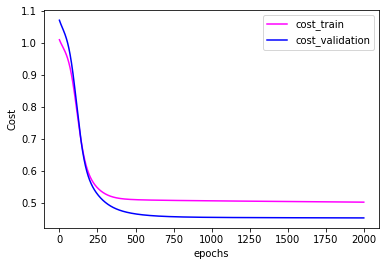

In [38]:
costs = np.squeeze(costs)
plt.plot(costs, color='magenta')
plt.plot(costs_dev, color='blue')

plt.ylabel('Cost')
plt.xlabel('epochs')
plt.legend(['cost_train', 'cost_validation']);

<font size=4>
    
 ## Precision:

Para calcular la precision del modelo se usa el error cuadrático medio, MSE:

$$100-MSE*100$$

es decir

$$100-(\dfrac{1}{m_{test}}\sum_{i=1}^{m_{test}} (y_{i}-a_{i})^2)*100$$

In [39]:
predictions_train = predict(opt_parameters, x_train, y_train)

print("train accuracy: {} %".format(100 - np.mean(np.power(predictions_train-y_train, 2)) * 100))

train accuracy: 46.521153779462665 %


In [40]:
predictions_test = predict(opt_parameters, x_test, y_test)
print("test accuracy: {0:.2f} %".format(100 - np.mean(np.power(predictions_test-y_test, 2)) * 100))

test accuracy: 43.40 %


___

<font size=6 color='blue'>

<center> Implementación de  la red neuronal empleando el$$$$ Framework Keras    

<font size=4 color='black'>

[Keras](https://keras.io/)

In [41]:
import tensorflow as tf

In [42]:
from platform import python_version
import pkg_resources
def version_library(programa):
    return pkg_resources.get_distribution(programa).version
programas=['numpy', 'tensorflow', 'matplotlib']

import itertools
from itertools import product
for v in product(iter(programas)):
    print(v[0])
    try:
        print(version_library(v[0]))
    except Exception as e: print(e)

numpy
1.19.5
tensorflow
2.6.0
matplotlib
3.5.1


In [43]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import initializers

np.random.seed(1)

In [44]:
keras.__version__

'2.6.0'

<font size=5 color='blue'>
Definición general de la arquitectura de la red neuronal

In [45]:
def architecture(n_hidden, initializer, activation, input_shape):
    
    model = Sequential()
        
    model.add(Dense(units=n_hidden,                 #units da el número de nodos 
                    kernel_initializer=initializer, # Initiallizacion de los pesos W
                    bias_initializer='zeros',       # Inicialización del bias
                    activation=activation,          # Función de activación
                    input_shape=input_shape))       # Da el numero de nodos de la capa de entrada.
                                                    # Este número corresponde al número de rasgos X que definen
                                                    # al sistema de estudio
     
    model.add(Dense(units=1,
                    kernel_initializer=initializer,
                    bias_initializer='zeros',
                    activation = activation))
    
    return model

<font size=5 color='blue'>
Generación de una arquitectura específica

In [46]:
input_shape = (10,)
n_hidden = 4
initializer = tf.keras.initializers.RandomUniform(minval=0., maxval=0.1)
#initializer="uniform"
#initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
activation = 'tanh'

model_keras = architecture(n_hidden, initializer, activation, input_shape)

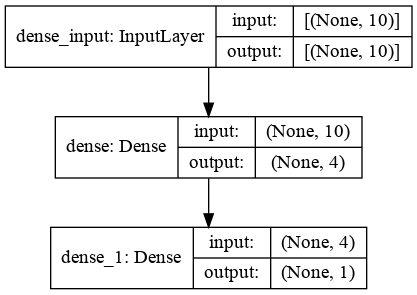

In [47]:
plot_model(model_keras, to_file='model.png', show_shapes=True, rankdir='TB', 
      expand_nested=True, show_layer_names=True, dpi=96)

In [48]:
model_keras.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 44        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


<font size=5 color='blue'>
Métrica y optimizador empleados para el aprendizaje

In [49]:
lr = 0.01

optimizer = keras.optimizers.SGD(learning_rate=lr, momentum=0.0, nesterov=False)
loss = tf.keras.losses.MeanSquaredError()
acc = tf.keras.metrics.MeanSquaredError()

model_keras.compile(loss=loss, 
              optimizer=optimizer,
              metrics=[acc])

<font size=5 color='blue'>
    
Entrenamiento

In [2]:
epochs = 200
start_time = time.time()
val_split=0.1

history_model = model_keras.fit(train_x, train_y,
                          epochs=epochs,
                          batch_size=32,
                          validation_split=val_split, 
                          shuffle=True,
                          verbose=2)

end_time = time.time()
print("Time for training: {:10.4f}s".format(end_time - start_time))

NameError: name 'time' is not defined

<font size=5 color="blue">

Gráfica del costo como función de la época    

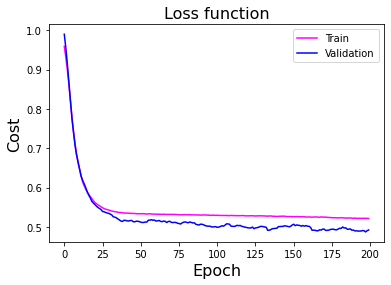

In [51]:
plt.plot(history_model.history['loss'], 'magenta')
plt.plot(history_model.history['val_loss'], 'blue')
plt.title('Loss function', size=16)
plt.ylabel('Cost', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['Train', 'Validation'], loc='upper right');

<font size=5, color=blue>
Evaluación del entrenamiento. Se realiza con los datos de prueba.

In [52]:
scores = model_keras.evaluate(test_x, test_y)
print('Test loss:', scores[0])

2/2 [==============================] - 0s 2ms/step - loss: 0.5217 - mean_squared_error: 0.5217
Test loss: 0.5217044353485107


<font size=5, color=blue>
Inferencia

In [53]:
predictions = model_keras.predict(test_x)
print(predictions.shape)

(45, 1)


<font size=5, color=blue>
Predicción para el primer paciente del conjunto muestras test_x

<font size=4 color='black'>
Dado que la red fue entrenada con datos reescalados, para las predicciones es invertir este escalamiento para obtener los valores correctos para la variable objetivo, Y.
mu es el valor medio de la variable objetivo de las muestras empleadas en entrenamiento; sigma es la desviación estandar de la distribución de la variable objetivo de las muestras.

In [54]:
predictions[0]*sigma + mu

AGE     50.730344
SEX      1.548849
BMI     27.211129
BP      97.009408
S1     194.877806
S2     120.618178
S3      52.033284
S4       4.288001
S5       4.728594
S6      93.130151
Y      164.713984
dtype: float64

In [55]:
accuracy = (1.0 - np.mean(np.power((predictions-test_y),2)))*100.0

In [56]:
(print("test accuracy: {0:.2f} %".format(accuracy)))

test accuracy: 47.83 %
